# Assignment No :- 05

# Title :- 
# Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset. 
# Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes 

# Name :- Shubham Jain

# Class :- BE-1

# Roll no :- 405A036

# Batch :- B

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [8]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
data = pd.DataFrame(df)

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
#Replace zeros with null values and then with mean of respective columns for these columns
#[Glucose, BloodPressure, SkinThickness, Insulin, BMI]
cols_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in cols_clean:
    data[i] = data[i].replace(0, np.NaN)
    cols_mean = int(data[i].mean(skipna=True))
    data[i] = data[i].replace(np.NaN, cols_mean)
data1 = data
data1.head().style.highlight_max(color="blue").highlight_min(color="lime")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008437227348>,
      dtype=object)

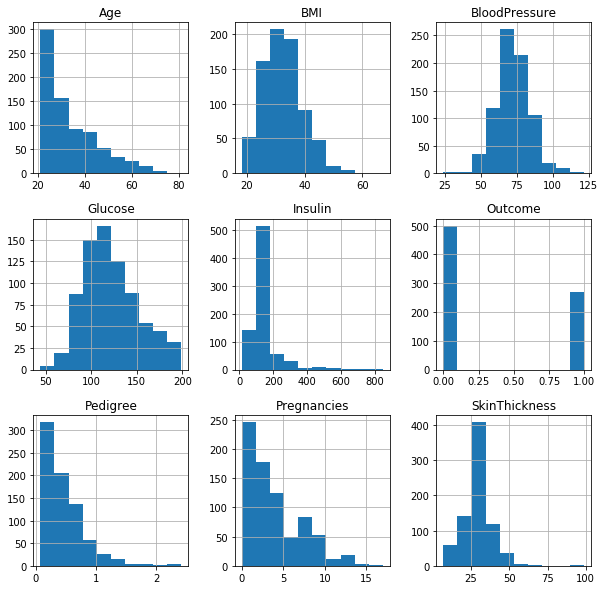

In [13]:
data1.hist(figsize = (10, 10))

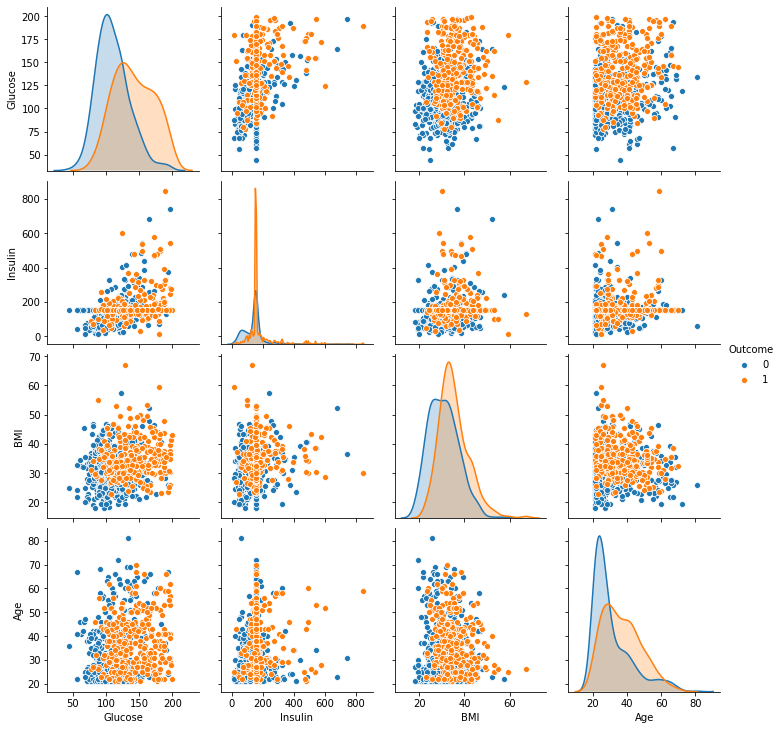

In [14]:
graph = ['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
print(sns.pairplot(data1[graph], hue='Outcome', diag_kind='kde'))

## Spliting Data into independent and dependent variables

In [15]:
data1.iloc[:, :8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [16]:
data1.iloc[:, 8:]

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [17]:
x = data1.iloc[:, :8]
y = data1.iloc[:, 8:]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)

In [91]:
knn.fit(x_train, y_train)

E:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [92]:
predict_y = knn.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict_y)

In [94]:
accuracy

0.8051948051948052

In [95]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predict_y)
cnf_matrix

array([[96, 11],
       [19, 28]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

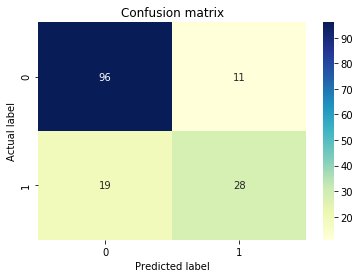

In [96]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')                                                 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [98]:
#F1-score is the harmonic mean of precision and recall. 
#It combines precision and recall into a single number using the following formula: (2*precision*recall)/(precision+recall) 
from sklearn.metrics import f1_score
print("F1 Score : ",f1_score(y_true=y_test, y_pred=predict_y))

F1 Score :  0.6511627906976744


In [99]:
#The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.
#Formula:- TP/TP+FN
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_true=y_test, y_pred=predict_y))

Recall Score :  0.5957446808510638


In [100]:
#Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model.
#Formula:- TP/TP+FP
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_true=y_test, y_pred=predict_y))

Precision Score :  0.717948717948718
